# Linear Regression - Ridge Regression   
-------------------------

_Authors: Khal Makhoul, W.P.G.Peterson_  

## Project Guide  

--------------------
- [Project Overview](#overview)  
- [Data Review](#data)  
- [Coding Ridge Regression](#code)
- [Ridge Regression in `sklearn`](#sklearn)  

<a id = "overview"></a>
## Project Overview  
-------------
#### EXPECTED TIME 2.5 HRS  

This assignment will test your ability to code your own version of ridge-regularized regression in `Python`. This assignment draws upon and presupposed the knowledge found in the lectures for Week 2. If ever a theoretical questions arises as to "why" we are doing something, please refer back to those lectures.  

The assignment also builds upon the work performed in assignment 1 "*Linear Regression - Least Squares*". The data used will be the same. Though the last assignment tested your ability to read data into `Pandas` from a `.csv`. Those fundamental processes will not be directly tested here.

In coding Ridge Regression you will be asked to:  
- Mean center target variable and mean center / standardize observation  
- Calculate Ridge Regression weights using linear algebra
- Create a  hyperparameter tuning process   

**Motivation**: Ridge Regression offers a way to mitigate some of the weaknesses of Least Squares Linear Regression to build more robust models.  

**Objectives**: This assignmet will -  

- Test `Python` competency and mathematical understandings of Ridge Regression
- Begin to introduce the concept of hyper-parameter tuning  

**Problem**: Using housing data, we will attempt to predict house price using living area with a regression model.  

**Data**: Data comes from [Kaggle's House Prices Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).  

See above link for Description of data.

<a id = "data"></a>  
### Data Exploration

Below provides a review of the "Housing" dataset.

In [1]:
### This cell imports the necessary modules and sets a few plotting parameters for display

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)  

### Read in the data
tr_path = '../resource/asnlib/publicdata/train.csv'
test_path = '../resource/asnlib/publicdata/test.csv'

data = pd.read_csv(tr_path)  

### The .head() function shows the first few lines of data for perspecitve
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
data[data.SalePrice > 5000 ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


#### Question 1

In [2]:
### GRADED
### Which column has the most "null" values? assign name as string to ans1.
### ### CAPITALIZATION/SPELLING MATTERS e.g. 'Street' != 'street'
### How many nulls are in that column? assign number as int to ans2
### YOUR ANSWER BELOW

ans1 = 'PoolQC'
ans2 = 1453

In [3]:
nulls = data.isnull().sum()
print(nulls)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [4]:
type(nulls)

pandas.core.series.Series

In [5]:
nulls.nlargest(1)

PoolQC    1453
dtype: int64

In [17]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


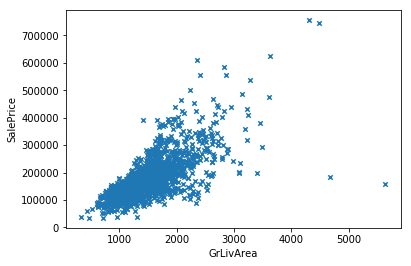

In [10]:
data.plot('GrLivArea', 'SalePrice', kind = 'scatter', marker = 'x');

#### Question 2

In [6]:
### GRADED
### In building regressions below, a subset of our data will be used.

### Practice subsetting a DataFrame below.
### Create a DataFrame only containing the "Street" and "Alley" columns from 
### the `data` DataFrame.

### Assign to 'ans1'
### YOUR ANSWER BELOW

ans1 = data[['Street', 'Alley']]
ans1.head()

,Street,Alley
0,Pave,NaN
1,Pave,NaN
2,Pave,NaN
3,Pave,NaN
4,Pave,NaN


In [19]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id = "code"></a>
### Coding Ridge Regression   

#### Preprocessing
Before implementing Ridge Regression, it is important to mean-center our target variable and mean-center and standardize observations. We will do this according to the following:  
#### Mean Center Target
$$y_{cent} = y_0 - \bar{y}$$

#### Standardize Observations
$$X_{std} = \frac{X_0-\bar{X}}{s_{X}}$$

Where $\bar{X}$ is the sample mean of X and $s_{X}$ is the sample standard deviation of X.  

NOTE: The sample standard deviation should be calculated with 0 "Delta Degrees of Freedom"

#### Question 3:

In [20]:
np.array([[1, 2,], [3, 4]])

array([[1, 2],
       [3, 4]])

In [23]:
a =np.array([[1, 2,], [3, 4]])
b = np.ones(2).reshape(-1,1)


[[1.]
 [1.]]


In [24]:
b

array([[1.],
       [1.]])

In [30]:
a

array([[1, 2],
       [3, 4]])

In [31]:
b.shape

(2, 1)

In [32]:
np.concatenate((a, b), axis = 1)

array([[1., 2., 1.],
       [3., 4., 1.]])

In [7]:
### GRADED
### Why are the centering / standardization transformations described above important for ridge regression?
### 'a') Regression works best when values are unitless
### 'b') The transformations makes the regression more interpretable
### 'c') Ridge penalizes large coefficients; the transformations make the coefficients of similar scales
### 'd') It isn't important

### Assign character associated with your choice as a string to ans1
### YOUR ANSWER BELOW

ans1 = 'c'

In [55]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 4:
$$X_{std} = \frac{X_0-\bar{X}}{s_{X}}$$  

NOTE: The sample standard deviation should be calculated with 0 "Delta Degrees of Freedom".  
If your answer does not match the example answer, check the default degrees of freedom in your standard deviation function.

In [2]:
### GRADED
### Code a function called "standardize" 
### ACCEPT one input, a list of numbers
### RETURN a list where those values have been standardized.

### To standardize, subtract the mean of the list and divide by standard deviation.
### Please use np.std for calculating standard deviation
### YOUR ANSWER BELOW
num_list = [1,2,3,3,4,4,5,5,5,5,5]
def standardize( num_list):
    num_list = [1,2,3,3,4,4,5,5,5,5,5] 
    nl_sd = np.std(num_list) # calculating standard deviation
    nl_mean = np.mean(num_list) # calculating mean
    nl_std1 = (num_list - np.mean(num_list))/ np.std (num_list) # standardization
    nl_std = np.round(nl_std1, 2) # rounding to 2 decimal places
    
    return nl_std

nl_std = standardize (num_list)
print (nl_std) # testing the code
        
 

[-2.11 -1.36 -0.61 -0.61  0.14  0.14  0.88  0.88  0.88  0.88  0.88]


In [6]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [56]:
  
def preprocess_for_regularization(data, y_column_name, x_column_names):
    
    data = pd.read_csv(tr_path).head()
    data_f = data.filter(['GrLivArea', 'YearBuilt', 'SalePrice'])
    std_sp = np.std(data_f. SalePrice)
    data_c = (data_f - np.mean(data_f))/np.std(data_f)
    prepro_data = data_c.iloc[:, :-1].join(data_c[['SalePrice']]*std_sp)
    return prepro_data
print(preprocess_for_regularization(data,'salePrice', ['GrLivArea','YearBuilt'])) #testing the code


   GrLivArea  YearBuilt  SalePrice
0  -0.082772   0.716753     7800.0
1  -1.590161  -0.089594   -19200.0
2   0.172946   0.657024    22800.0
3  -0.059219  -1.911342   -60700.0
4   1.559205   0.627159    49300.0


Below we will create a function which will preprocess  our data by performing:
* mean subtraction from $y$,
* dimension standardization for $x$.

Both according to the equations set out below.

#### Mean Center Target
$$y_{cent} = y_0 - \bar{y}$$

#### Standardize Observations
$$X_{std} = \frac{X_0-\bar{X}}{s_{X}}$$  

NOTE: the sample standard deviation should be calculated with 0 "Delta Degrees of Freedom"  
If your answer does not match the example answer, check the default degrees of freedom in your standard deviation function.

#### Question 5

In [10]:

   # """
   # Perform mean subtraction and dimension standardization on data
        
   # Positional argument:
   #     data -- a pandas dataframe of the data to pre-process
   #     y_column_name -- the name (string) of the column that contains
   #         the target of the training data.
   #     x_column_names -- a *list* of the names of columns that contain the
   #         observations to be standardized
        
   # Returns:
   #     Return a DataFrame consisting only of the columns included
   #     in `y_column_name` and `x_column_names`.
   #     Where the y_column has been mean-centered, and the
   #     x_columns have been mean-centered/standardized.
        
        
   # Example:
   #    data = pd.read_csv(tr_path).head()
   #     prepro_data = preprocess_for_regularization(data,'SalePrice', ['GrLivArea','YearBuilt'])
        
   #     print(prepro_data) #-->
   #                GrLivArea  YearBuilt  SalePrice
   #             0  -0.082772   0.716753     7800.0
   #             1  -1.590161  -0.089594   -19200.0
   #             2   0.172946   0.657024    22800.0
   #             3  -0.059219  -1.911342   -60700.0
   #             4   1.559205   0.627159    49300.0
    
   # NOTE: The sample standard deviation should be calculated with 0 "Delta Degrees of Freedom"
    
   # If your answer does not match the example answer,
   # check the default degrees of freedom in your standard deviation function.
   # """
def preprocess_for_regularization(data, y_column_name, x_column_names):
        data = pd.read_csv(tr_path).head()
        y_column_name = data['SalePrice'] # y target
        y_mct = y_column_name - np.mean(y_column_name) # y mean centered
        x_column_names = data[['GrLivArea', 'YearBuilt']] # x observations
        x_st = (x_column_names - np.mean(x_column_names))/ np.std (x_column_names) # meancentered/std
        y_df = pd.DataFrame(y_mct, columns = ['SalePrice']) # y dataframe
        x = pd.DataFrame(x_st) # x dataframe
        reg = pd.merge(x,y_df, left_on="GrLivArea", right_on="SalePrice", right_index=True, left_index=True)
        reg_r = np.round(reg,5)
        return reg_r
prepro_data = preprocess_for_regularization(data,'SalePrice', ['GrLivArea', 'YearBuilt'])
print(prepro_data) # testing the code

   GrLivArea  YearBuilt  SalePrice
0   -0.08277    0.71675     7800.0
1   -1.59016   -0.08959   -19200.0
2    0.17295    0.65702    22800.0
3   -0.05922   -1.91134   -60700.0
4    1.55921    0.62716    49300.0


/usr/local/lib/python3.6/site-packages/pandas/core/reshape/merge.py:963: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)


In [15]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Next, you'll implement the equation for ridge regression using the closed form equation:  

$$w_{RR}=(\lambda+X^TX)^{-1}X^Ty$$  

The function will be very similar to the function you wrote for Least Squares Regression with a slightly different matrix to invert.  

NB: Many `numpy` matrix functions will be useful. e.g. `np.matmul`, `np.linalg.inv`, `np.ones`, `np.transpose`, and`np.identity`.

The main change from Least Squares Regression is that $\lambda$ is a parameter *we* must set. This is different from the $w$ parameters that we calculate from either closed form or approximation algorithms.  

We will address tuning parameters such as $\lambda$ in the next section.  

#### Question 6

In [42]:
### GRADED
### Code a function called "ridge_regression_weights"
### ACCEPT three inputs:
### Two matricies corresponding to the x inputs and y target
### and a number (int or float) for the lambda parameter

### RETURN a numpy array of regression weights

### The following must be accomplished:

### Ensure the number of rows of each the X matrix is greater than the number of columns.
### ### If not, transpose the matrix.
### Ultimately, the y input will have length n.
### Thus the x input should be in the shape n-by-p

### *Prepend* an n-by-1 column of ones to the input_x matrix

### Use the above equation to calculate the least squares weights.
### This will involve creating the lambda matrix---
### ### a p+1-by-p+1 matrix with the "lambda_param" on the diagonal
### ### p+1-by-p+1 because of the prepended "ones".

### NB: Pay close attention to the expected format of the returned
### weights. It is different / simplified from Assignment 1.

### YOUR ANSWER BELOW


#    """Calculate ridge regression least squares weights.
    
#    Positional arguments:
#        input_x -- 2-d matrix of input data
#        output_y -- 1-d numpy array of target values
#        lambda_param -- lambda parameter that controls how heavily
#            to penalize large weight values
        
#    Example:
#        training_y = np.array([208500, 181500, 223500, 
#                                140000, 250000, 143000, 
#                                307000, 200000, 129900, 
#                                118000])
                                
#        training_x = np.array([[1710, 1262, 1786, 
#                                1717, 2198, 1362, 
#                               1694, 2090, 1774, 
#                                1077], 
#                               [2003, 1976, 2001, 
#                                1915, 2000, 1993, 
#                                2004, 1973, 1931, 
#                                1939]])
#        lambda_param = 10
        
#        rrw = ridge_regression_weights(training_x, training_y, lambda_param)
        
#        print(rrw) #--> np.array([-576.67947107,   77.45913349,   31.50189177])
#        print(rrw[2]) #--> 31.50189177
        
#    Assumptions:
#        -- output_y is a vector whose length is the same as the
#        number of observations in input_x
#        -- lambda_param has a value greater than 0
#    """
    
#    weights = np.array([])
#    return weights
training_x = np.array([[1710, 1262, 1786, 
                                                    1717, 2198, 1362, 
                                                    1694, 2090, 1774, 
                                                    1077], 
                                                   [2003, 1976, 2001, 
                                                    1915, 2000, 1993, 
                                                    2004, 1973, 1931, 
                                                    1939]])
training_y = np.array([[208500, 181500, 223500, 
                                                    140000, 250000, 143000, 
                                                    307000, 200000, 129900, 
                                                    118000]])
lamda_param = 10


def ridge_regression_weights(input_x, output_y, lambda_param):
    training_y = np.array([[208500, 181500, 223500, 140000, 250000, 143000,307000, 200000, 129900,118000]])
    training_x = np.array([[1710, 1262, 1786, 
                                                    1717, 2198, 1362, 
                                                    1694, 2090, 1774, 
                                                    1077], 
                                                   [2003, 1976, 2001, 
                                                    1915, 2000, 1993, 
                                                    2004, 1973, 1931, 
                                                    1939]])
        
    lamda_param = 10
        
    y_reshape = training_y.transpose() #reshaping y
    x_reshape = training_x.transpose() #reshaping x
    pre = np.ones(10) #creating a matrix of ones
    preshape = pre.reshape(10,1) #reshape ones
    x = np.append(preshape, x_reshape, axis = 1) #prepend ones to x
    x_trans = x.transpose() # xtranspose
    xt_y = np.matmul(x_trans, y_reshape) # xtransposex * y
    xt_x = np.matmul(x_trans, x) #Xtranspose x 
    diagonalm = np.array([[10, 0 , 0], [0, 10 ,0], [0, 0, 10]]) #lamda
    w_lamda = np.add(diagonalm,xt_x) # lamda add xtranspose x
    w_lamda_inv = np.linalg.inv(w_lamda) #inv of above
    weigths = np.matmul(w_lamda_inv, xt_y) #above x xtranp.y
    return weigths
rrw = (ridge_regression_weights(training_x, training_y, lamda_param))

print(rrw.shape)  #test
 # print(rrw[2]) #test 2

(3, 1)


In [64]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Selecting the $\lambda$ parameter

For our final function before looking at the `sklearn` implementation of ridge regression, we will create a hyper-parameter tuning algorithm.  

In ridge regression, we must pick a value for $\lambda$. We have some intuition about $\lambda$ from the equations that define it: small values tend to emulate the results from Least Squares, while large values will reduce the dimensionality of the problem. But the choice of $\lambda$ can motivated with a more precise quantitative treatment.

Eventually, we will look to choose the value of $\lambda$ that minimizes validation error, which we will determine using $k$-fold cross-validation.

For this example here, we will solve a simpler problem: Find a value that minimizes the of the list returned by a function.

In [67]:
### Example of hiden function below:

### `hidden` takes a single number as a parameter (int or float) and returns a list of 1000 numbers
### the input must be between 0 and 50 exclusive

def hidden(hp):
    if (hp<=0) or (hp >= 50):
        print("input out of bounds")
    
    nums = np.logspace(0,5,num = 1000)
    vals = nums** 43.123985172351235134687934
    
    user_vals = nums** hp
    
    return vals-user_vals

In [68]:
hidden(10)

array([0.00000000e+000, 5.21602216e-001, 1.44269840e+000, 3.02824512e+000,
       5.71471536e+000, 1.02206282e+001, 1.77282466e+001, 3.01822582e+001,
       5.07807508e+001, 8.47822724e+001, 1.40832459e+002, 2.33144706e+002,
       3.85084668e+002, 6.35062327e+002, 1.04621709e+003, 1.72233776e+003,
       2.83403092e+003, 4.66173544e+003, 7.66642746e+003, 1.26058419e+004,
       2.07255113e+004, 3.40727870e+004, 5.60130097e+004, 9.20779670e+004,
       1.51360544e+005, 2.48807182e+005, 4.08986104e+005, 6.72281340e+005,
       1.10507416e+006, 1.81647877e+006, 2.98585170e+006, 4.90801023e+006,
       8.06756031e+006, 1.32610730e+007, 2.17979119e+007, 3.58303436e+007,
       5.88961561e+007, 9.68105887e+007, 1.59132441e+008, 2.61573989e+008,
       4.29962286e+008, 7.06750554e+008, 1.16172127e+009, 1.90957938e+009,
       3.13887116e+009, 5.15951950e+009, 8.48096019e+009, 1.39405783e+010,
       2.29148254e+010, 3.76662441e+010, 6.19138882e+010, 1.01770953e+011,
       1.67286003e+011, 2

Run the above cell and test out the functionality of `hidden`. Remember it takes a single number, between 0 and 50, as an argument

#### Question 7

In [71]:
### GRADED
### Code a function called "minimize"
### ACCEPT one input: a function.

### That function will be similar to `hidden` created above and available for your exploration.
### Like 'hidden', the passed function will take a single argument, a number between 0 and 50 exclusive 
### and then, the function will return a numpy array of 1000 numbers.

### RETURN the value that makes the mean of the array returned by 'passed_func' as close to 0 as possible

### Note, you will almost certainly NOT be able to find the number that makes the mean exactly 0
### YOUR ANSWER BELOW

def minimize( passed_func):
    """
    Find the numeric value that makes the mean of the
    output array returned from 'passed_func' as close to 0 as possible.
    
    Positional Argument:
        passed_func -- a function that takes a single number (between 0 and 50 exclusive)
            as input, and returns a list of 1000 floats.
        
    Example:
        passed_func = hidden
        min_hidden = minimize(passed_func)
        print(round(min_hidden,4))
        #--> 43.1204 (answers will vary slightly, must be close to 43.123985172351)
    
    """
    # Create values to test
    test_vals = list(np.linspace(.1,49.9, 1000))
    
    # Find mean of returned array from function
    ret_vals = [abs(np.mean(passed_func(x))) for x in test_vals]
    
    # Find smallest mean
    min_mean = min(ret_vals)
    
    # Return the test value that creates the smallest mean
    return test_vals[ret_vals.index(min_mean)]


In [72]:
passed_func = hidden
min_hidden = minimize(passed_func)
print(round(min_hidden,4))

43.1204


In [45]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


The above simulates hyper parameter tuning.  

In the case of ridge regression, you would be searching lambda parameters to minimize validation error.  

The `hidden` function would be analogous to the model building; the returned list analogous to residuals; and the mean of that list analogous to validation error.  

See below for an example of using the functions built above that automatically performs hyper-parameter tuning using mean-absolute-deviation.

In [77]:
def lambda_search_func(lambda_param):
    
    # Define X and y
    # with preprocessing
    df = preprocess_for_regularization(data.head(50),'SalePrice', ['GrLivArea','YearBuilt'])
    
    y_true = df['SalePrice'].values
    X = df[['GrLivArea','YearBuilt']].values
    
    # Calculate Weights then use for predictions
    weights = ridge_regression_weights(X, y_true, lambda_param )
    y_pred = weights[0] + np.matmul(X,weights[1:])
    
    # Calculate Residuals
    resid = y_true - y_pred
    
    # take absolute value to tune on mean-absolute-deviation
    # Alternatively, could use:
    # return resid **2-S
    # for tuning on mean-squared-error
    
    return abs(resid)

minimize(lambda_search_func)    # --> about 1.4957957957957957

/usr/local/lib/python3.6/site-packages/pandas/core/reshape/merge.py:963: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)


0.1

Implementing a k-folds cross-validation strategy will come in later assignments.

#### Question 8

In [ ]:
### GRADED
### Why is cross-validation useful?
### 'a') to minimize the liklihood of overfitting
### 'b') Cross-validation allows us to fit on all our data
### 'c') cross-validation standardizes outputs
### 'd') cross-validation is not useful
### assing the character associated with your choice as a string to ans1
### YOUR ANSWER BELOW

ans1 = 'a'

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id = "sklearn"></a>

### Ridge Regression in `sklearn`  

Below gives the syntax for implementing ridge regression in sklearn.

In [78]:
from sklearn.linear_model import Ridge, LinearRegression

### Note, the "alpha" parameter defines regularization strength.
### Lambda is a reserved word in `Python` -- Thus "alpha" instead

### An alpha of 0 is equivalent to least-squares regression
lr = LinearRegression()
reg = Ridge(alpha = 100000)
reg0 = Ridge(alpha = 0)

# Notice how the consistent sklearn syntax may be used to easily fit many kinds of models
for m, name in zip([lr, reg, reg0], ["LeastSquares","Ridge alpha = 100000","Ridge, alpha = 0"]):
    
    m.fit(data[['GrLivArea','YearBuilt']], data['SalePrice'])
    print(name, "Intercept:", m.intercept_, "Coefs:",m.coef_,"\n")

LeastSquares Intercept: -2024976.3625856352 Coefs: [  95.16733349 1045.86241944] 

Ridge alpha = 100000 Intercept: -1876820.7548806793 Coefs: [ 96.01060155 970.05661101] 

Ridge, alpha = 0 Intercept: -2024976.3625856352 Coefs: [  95.16733349 1045.86241944] 



Note, in the above example, an alpha of 100,000 is set for the ridge regularization. The reason an alpha value this high is required is because standardization / mean centering of our inputs did not occur, and instead of working with inputs on the order of [-4,4] we are on the interval of [0,2000].  

#### Question 9:

In [ ]:
### GRADED
### Above, the coefficent around 95/96 corresponds with:
### 'a') Living Area
### 'b') Year Built
### 'c') Sale Price
### Assign character associated with your choice as string to ans1
### YOUR ANSWER BELOW

ans1 = 'a'

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Queston 10:

In [79]:
### GRADED
### True or False:
### A larger "alpha" corresponds to a greater amount of regularization
### assign boolean choice to ans1

ans1 = True

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
